In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np 
import itertools

In [2]:
def afficher_reseau_hopfield(poids):
  G = nx.Graph()
  size = len(poids[:,0])
  for i in range(size):
    for j in range(i+1): #symetrie
      if(i != j): #diag = 0
        w = poids[i,j]
        G.add_edge(i,j, weight = w)

  positif = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
  negatif = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0]

  pos = nx.circular_layout(G)
  #noeuds
  nx.draw_networkx_nodes(G, pos, node_size=700)
  #edges
  nx.draw_networkx_edges(G, pos, edgelist=positif, width=3)
  nx.draw_networkx_edges(G, pos, edgelist=negatif, width=3, style="dashed")
  # label des noeuds
  nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
  # label des poids
  edge_labels = nx.get_edge_attributes(G, "weight")
  nx.draw_networkx_edge_labels(G, pos, edge_labels)

  ax = plt.gca()
  ax.margins(0.06)
  plt.axis("off")
  plt.tight_layout()
  plt.title("Reseau de Hopfield")
  plt.show()

In [3]:
def graphe_trajectoires(trajectoires, size): 
  G = nx.DiGraph()
  G.add_nodes_from(range(0, size))
  for connection in trajectoires:
    G.add_edge(connection[0], connection[1])
  pos = nx.nx_pydot.pydot_layout(G)
  nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                        node_size = 500)
  nx.draw_networkx_labels(G, pos)
  nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=20)  
  ax = plt.gca()
  ax.margins(0.06)
  plt.axis("off")
  plt.tight_layout()
  plt.title("Trajectoires du réseau de Hopfield")
  plt.show()

In [4]:
def random_hopfield(size, bipolar = True): #en cours, version bipolaire
  hopfield = np.empty((size,size))
  choices = np.array([-1,1])
  if(bipolar == False):
    choices[0] = 0
  for i in range(size):
    for j in range(i+1):
      if(i != j):
        weight = np.random.choice(choices)
        hopfield[i][j] = weight
        hopfield[j][i] = weight
      else: 
        hopfield[i][i] = 0
  return hopfield

In [5]:
def propagation(a, poids, size, synchrone = True):
  if synchrone == True: 
    e = np.matmul(poids,a)
    new_a = []
    for x in e:
      res = 0
      if(x >0):
        res = 1
      new_a.append(res)
  else:
    new_a = a
    for i in range(size):
      e= np.matmul(poids,a)
      e_i = e[i]
      temp = 0
      if(e_i>0):
        temp = 1
      new_a[i] = temp
  
  return new_a

In [6]:
def search_array(matrix, array): 
  size_array = len(array)
  for i in range(len(matrix[:,0])):
    for j in range(size_array):
      if(matrix[i,j]!=array[j]):
        break
      if(j == (size_array-1) and matrix[i,j]==array[j]):
        return i #retour de l'indice
  print("pas trouvé")

In [7]:
def etats_possibles(size):
  states = list(itertools.product(*[[0,1]]*size))
  etats = [np.array(etat) for etat in states]
  return np.matrix(etats)

In [8]:
def trajectoire(start_node, end, etats):
  end_node = search_array(etats, end)
  trajec = [start_node, end_node]
  return trajec

In [9]:
def trajectoires_reseau(poids, synchrone = True): 
  size = len(poids[0,:])
  etats = etats_possibles(size)
  deja_rencontre = set()
  trajectoires = []
  for i in range(len(etats)): 
    a = np.array(etats[i,:])
    a = a.flatten()
    noeud_a = search_array(etats, a)
    while (noeud_a not in deja_rencontre):
      deja_rencontre.add(noeud_a)
      end = propagation(a, poids, size, synchrone)
      traj = trajectoire(noeud_a, end, etats)
      trajectoires.append(traj)
      a = end
      noeud_a = traj[1]
  return trajectoires

In [10]:
def tab_energie(etats, poids): 
  energies = []
  for a in etats: 
    b = np.ravel(a)
    E = Energie(b, poids)
    energies.append(E)
  return energies
  

In [14]:
def Energie(a, poids):
  B = np.matmul(poids, a) 
  return int(-np.dot(a, B))

In [12]:
def hopfield_demo(size, synchrone=True): 
  poids = random_hopfield(size)
  afficher_reseau_hopfield(poids)
  print()
  trajectoires = trajectoires_reseau(poids, synchrone)
  etats = etats_possibles(size)
  graphe_trajectoires(trajectoires, size)
  print()
  print('Etats et energies associées')
  for i in range(np.power(2,size)):
    etat = etats[i]
    etat= np.ravel(etat)
    print(etat,',E=', Energie(etat,poids))

Démo, propagation synchrone


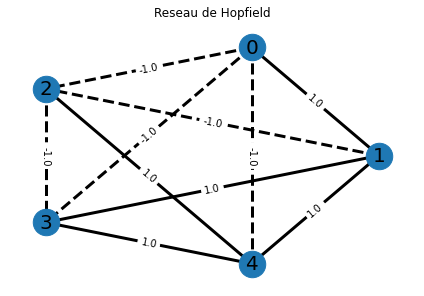

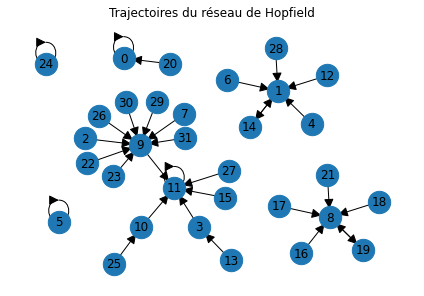


Etats et energies associées
[0 0 0 0 0] ,E= 0
[0 0 0 0 1] ,E= 0
[0 0 0 1 0] ,E= 0
[0 0 0 1 1] ,E= -2
[0 0 1 0 0] ,E= 0
[0 0 1 0 1] ,E= -2
[0 0 1 1 0] ,E= 2
[0 0 1 1 1] ,E= -2
[0 1 0 0 0] ,E= 0
[0 1 0 0 1] ,E= -2
[0 1 0 1 0] ,E= -2
[0 1 0 1 1] ,E= -6
[0 1 1 0 0] ,E= 2
[0 1 1 0 1] ,E= -2
[0 1 1 1 0] ,E= 2
[0 1 1 1 1] ,E= -4
[1 0 0 0 0] ,E= 0
[1 0 0 0 1] ,E= 2
[1 0 0 1 0] ,E= 2
[1 0 0 1 1] ,E= 2
[1 0 1 0 0] ,E= 2
[1 0 1 0 1] ,E= 2
[1 0 1 1 0] ,E= 6
[1 0 1 1 1] ,E= 4
[1 1 0 0 0] ,E= -2
[1 1 0 0 1] ,E= -2
[1 1 0 1 0] ,E= -2
[1 1 0 1 1] ,E= -4
[1 1 1 0 0] ,E= 2
[1 1 1 0 1] ,E= 0
[1 1 1 1 0] ,E= 4
[1 1 1 1 1] ,E= 0


In [15]:
print("Démo, propagation synchrone")
hopfield_demo(5, synchrone = True)